In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fastf1
import fastf1.plotting
from fastf1.core import Laps

In [2]:
quali = fastf1.get_session(2021, 22, 'Q')

In [3]:
laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Qualifying [v2.1.11]
api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
utils          INFO 	NumExpr defaulting to 8 threads.
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['9', '55', '3', '22', '63', '47', '5', '14', '11', '4', '77

In [4]:
wea = laps.get_weather_data()

In [5]:
wea

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
18,0 days 00:18:59.089000,25.5,54.8,1018.5,True,29.9,290,0.3
19,0 days 00:19:59.090000,25.5,55,1018.5,True,29.9,273,0.5
21,0 days 00:21:59.089000,25.4,55,1018.5,True,29.9,301,0.5
23,0 days 00:23:59.087000,25.4,54,1018.6,True,29.9,333,0.5
33,0 days 00:33:59.091000,25.2,55.5,1018.6,True,29.4,283,0.2
...,...,...,...,...,...,...,...,...
24,0 days 00:24:59.089000,25.4,53.6,1018.6,True,29.9,318,0.4
25,0 days 00:25:59.092000,25.4,53.8,1018.6,True,29.9,277,0.4
31,0 days 00:31:59.088000,25.2,56,1018.6,True,29.4,313,0.2
33,0 days 00:33:59.091000,25.2,55.5,1018.6,True,29.4,283,0.2


In [6]:
drivers = pd.unique(laps['Driver'])
print(drivers)

['HAM' 'VER' 'BOT' 'PER' 'NOR' 'TSU' 'GAS' 'SAI' 'RIC' 'LEC' 'STR' 'OCO'
 'RAI' 'GIO' 'ALO' 'VET' 'RUS' 'LAT' 'MSC' 'MAZ']


In [7]:
lap_Ham = laps.pick_driver('HAM')
fast_Ham = lap_Ham.pick_fastest()
telh = fast_Ham.get_telemetry()
lap_ve = laps.pick_driver('VER')
fast_ve = lap_ve.pick_fastest()
tele = fast_ve.get_telemetry()

In [8]:
telh

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2021-12-11 14:01:17.236,0 days 01:16:17.052000,,3313.952500,0 days 00:00:00,11121,237,6,100,0,8,interpolation,0.079482,0.000015,OnTrack,544,2076,-239
3,2021-12-11 14:01:17.309,0 days 01:16:17.125000,,3313.952500,0 days 00:00:00.073000,11173,238,6,100,0,8,pos,4.965096,0.000949,OnTrack,593,2083,-239
4,2021-12-11 14:01:17.357,0 days 01:16:17.173000,,3313.952500,0 days 00:00:00.121000,11277,240,6,100,0,8,car,8.198889,0.001567,OnTrack,624,2087,-238
5,2021-12-11 14:01:17.529,0 days 01:16:17.345000,,3313.952500,0 days 00:00:00.293000,11409,243,6,100,0,8,pos,19.921190,0.003809,OnTrack,740,2101,-239
6,2021-12-11 14:01:17.597,0 days 01:16:17.413000,16,3313.952500,0 days 00:00:00.361000,11541,246,6,100,0,8,car,24.598889,0.004703,OnTrack,786,2106,-239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2021-12-11 14:02:39.238,0 days 01:17:39.054000,16,1990.195000,0 days 00:01:22.002000,12220,220,5,100,0,8,car,5199.774444,0.994086,OnTrack,235,2047,-237
718,2021-12-11 14:02:39.329,0 days 01:17:39.145000,16,1992.561667,0 days 00:01:22.093000,11893,224,5,100,0,8,pos,5205.470266,0.995175,OnTrack,292,2051,-238
719,2021-12-11 14:02:39.478,0 days 01:17:39.294000,16,1994.928333,0 days 00:01:22.242000,11567,228,5,100,0,8,car,5214.974444,0.996992,OnTrack,381,2057,-238
720,2021-12-11 14:02:39.549,0 days 01:17:39.365000,16,1994.928333,0 days 00:01:22.313000,11364,232,5,100,0,8,pos,5219.574432,0.997872,OnTrack,425,2061,-239


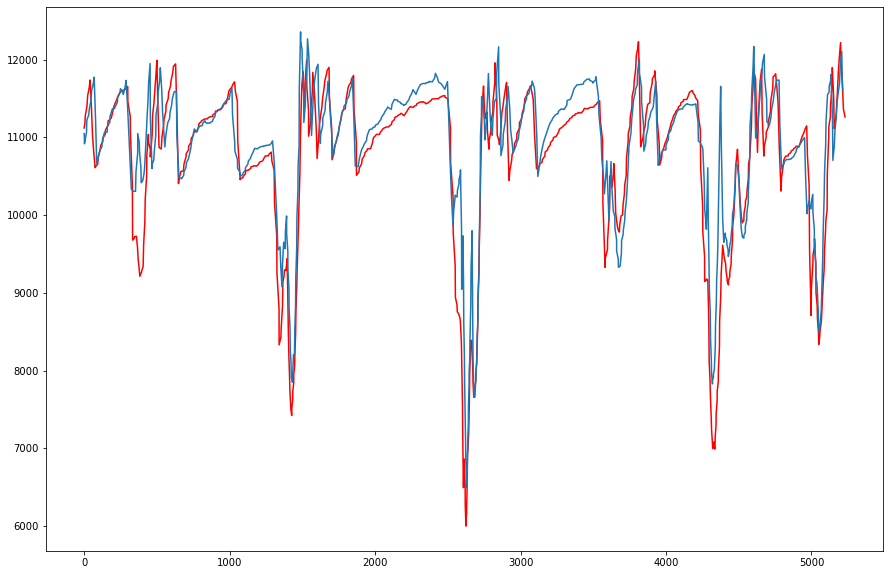

In [9]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(telh['Distance'], telh['RPM'], color = "red")
ax.plot(tele['Distance'], tele['RPM'])

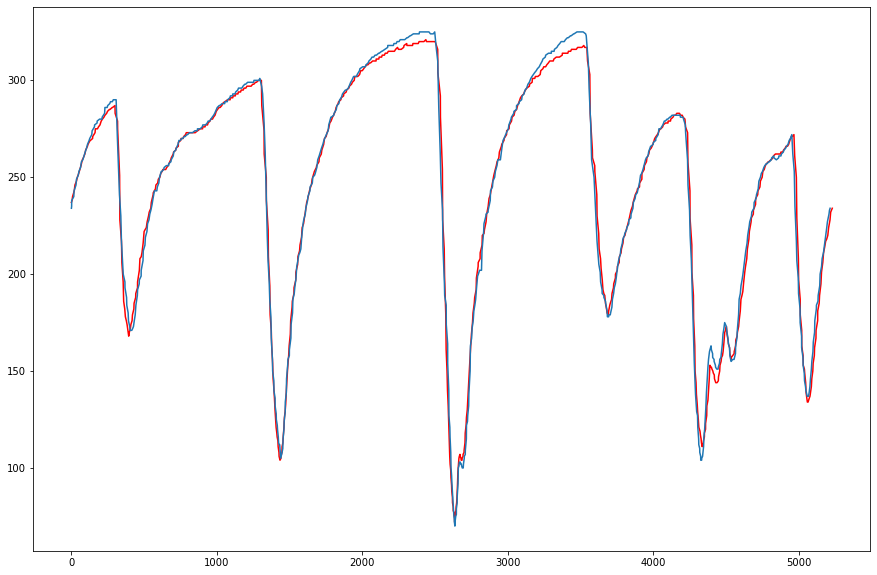

In [10]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(telh['Distance'], telh['Speed'], color = 'red')
ax.plot(tele['Distance'], tele['Speed'])

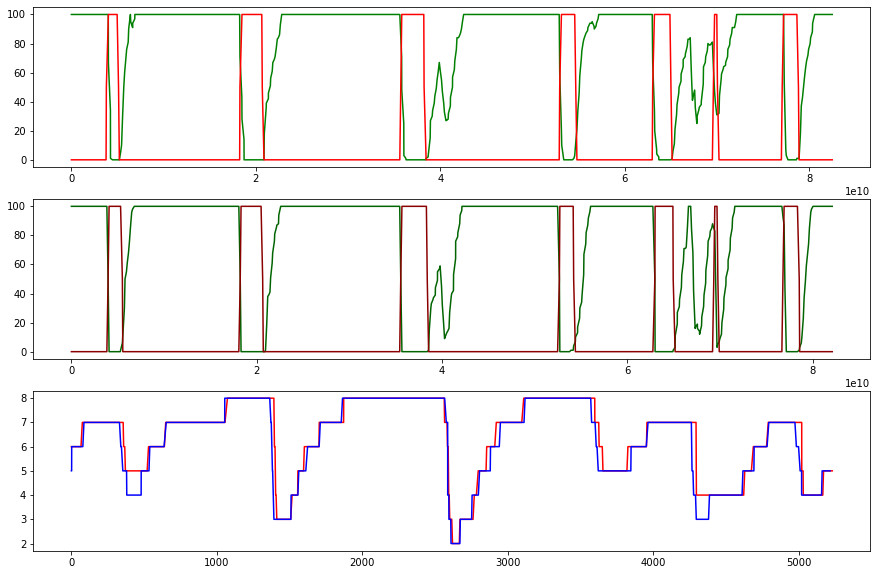

In [11]:
fig, ax = plt.subplots(3,1,figsize = (15,10))
ax[0].plot(telh['Time'], telh['Throttle'], color = 'green' )
ax[0].plot(telh['Time'], telh['Brake'], color = 'red' )
ax[1].plot(tele['Time'], tele['Throttle'], color = 'darkgreen')
ax[1].plot(tele['Time'], tele['Brake'], color = 'darkred' )
ax[2].plot(telh['Distance'], telh['nGear'],color = 'red')
ax[2].plot(tele['Distance'], tele['nGear'],color = 'blue')

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(telh['X'], telh['Y'], color = 'green' )

In [12]:
dif = telh['Speed']-tele['Speed']

In [13]:
def colors(column,p1 = 'green',p2 = 'red', other_color = 'lightgrey'):
    pal = []

    for item in column:
        if item < 0:
            pal.append(p2)
        elif item > 0:
            pal.append(p1)
        else:
            pal.append(other_color)
    return pal

In [14]:
dif = colors(dif)

In [15]:
dif

['green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'lightgrey',
 'lightgrey',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'lightgrey',
 'lightgrey',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'lightgrey',
 'green',
 'lightgrey',
 'red',
 'red',
 'lightgrey',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'lightgrey',
 'green',
 'lightgrey',
 'green',
 'green',
 '

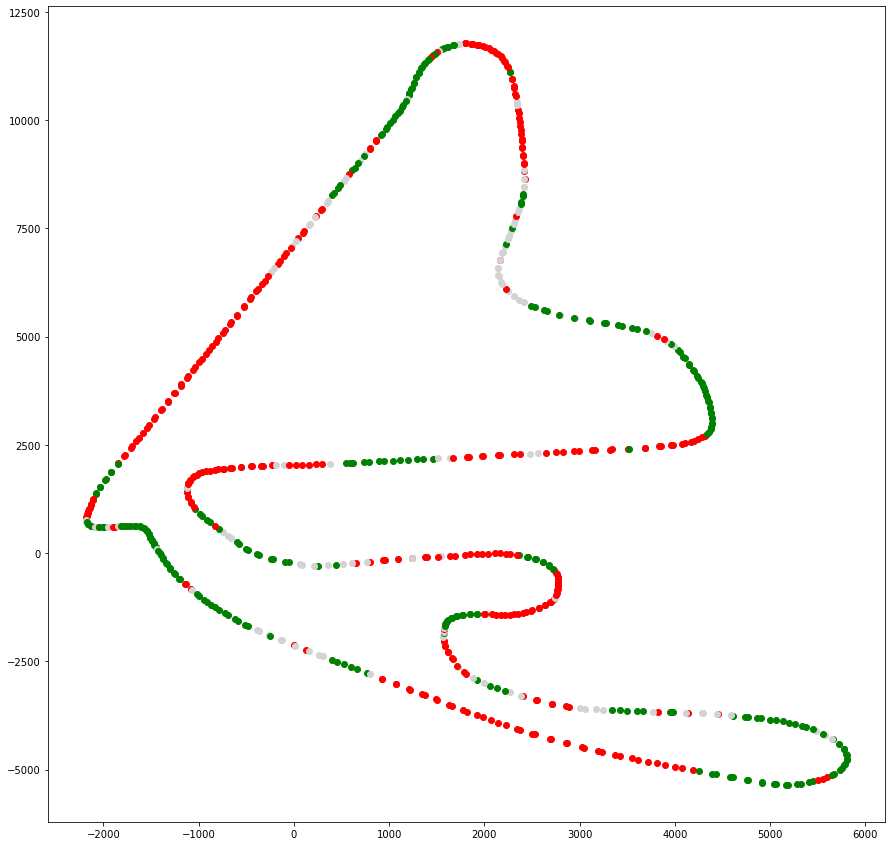

In [16]:
fig, ax = plt.subplots(figsize = (15,15))
for i in range(2,len(telh)):
    ax.scatter(telh.loc[i,'X'], telh.loc[i,'Y'] ,color = dif[i])

In [17]:
def colors2(column,p1 = 'green',p2 = 'red', other_color = 'lightgrey'):
    pal = []

    for item in column:
        if item == 8:
            pal.append(p2)
        elif item > 8:
            pal.append(p1)
        else:
            pal.append(other_color)
    return pal

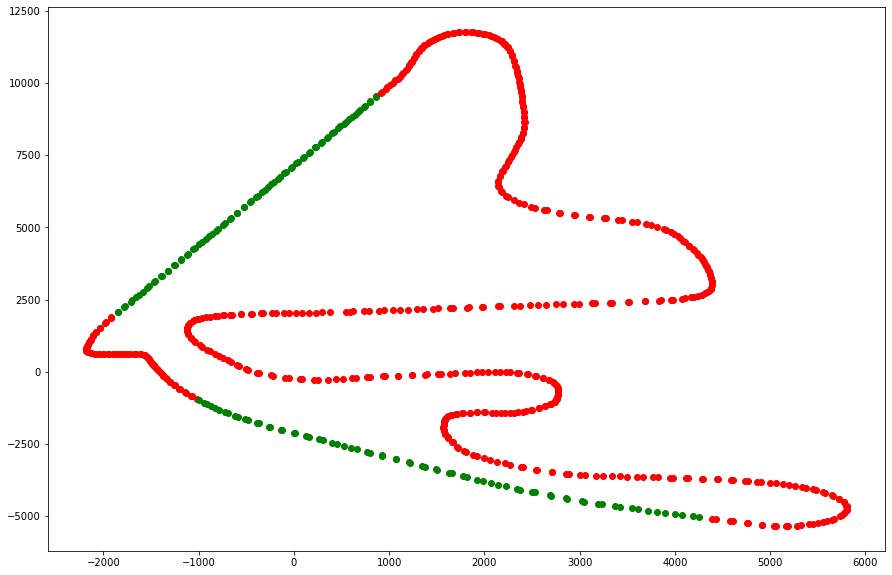

In [18]:
drs = colors2(telh['DRS'])
fig, ax = plt.subplots(figsize = (15,10))
for i in range(2,len(telh)):
    ax.scatter(telh.loc[i,'X'], telh.loc[i,'Y'] ,color = drs[i])

In [19]:
telh.describe()

,SessionTime,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Distance,RelativeDistance,X,Y,Z
count,720,720.000000,720,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0 days 01:16:58.251480555,2320.600411,0 days 00:00:41.199480555,10485.709722,228.193056,5.972222,77.277778,14.652778,8.877778,2713.102584,0.518687,1449.045833,2044.195833,-218.740278
std,0 days 00:00:23.863479332,526.485577,0 days 00:00:23.863479332,1282.900735,66.787169,1.737040,36.304087,34.743511,1.676660,1530.521227,0.292603,2079.153604,4793.285391,21.743876
min,0 days 01:16:17.052000,1711.834444,0 days 00:00:00,5998.000000,72.000000,2.000000,0.000000,0.000000,8.000000,0.079482,0.000015,-2181.000000,-5352.000000,-240.000000
25%,0 days 01:16:37.651000,1882.464236,0 days 00:00:20.599000,9913.250000,174.750000,4.000000,62.000000,0.000000,8.000000,1418.494331,0.271186,-372.000000,-1433.500000,-231.000000
50%,0 days 01:16:58.254500,2109.615556,0 days 00:00:41.202500,10961.000000,246.000000,7.000000,100.000000,0.000000,8.000000,2695.958913,0.515410,1644.000000,1240.500000,-226.000000
75%,0 days 01:17:18.821000,2830.618819,0 days 00:01:01.769000,11374.750000,282.000000,7.000000,100.000000,0.000000,8.000000,4124.372834,0.788492,2700.250000,5342.000000,-213.000000
max,0 days 01:17:39.532000,3313.952500,0 days 00:01:22.480000,12232.000000,321.000000,8.000000,100.000000,100.000000,14.000000,5230.574498,0.999975,5807.000000,11774.000000,-129.000000


In [20]:
telh

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2021-12-11 14:01:17.236,0 days 01:16:17.052000,,3313.952500,0 days 00:00:00,11121,237,6,100,0,8,interpolation,0.079482,0.000015,OnTrack,544,2076,-239
3,2021-12-11 14:01:17.309,0 days 01:16:17.125000,,3313.952500,0 days 00:00:00.073000,11173,238,6,100,0,8,pos,4.965096,0.000949,OnTrack,593,2083,-239
4,2021-12-11 14:01:17.357,0 days 01:16:17.173000,,3313.952500,0 days 00:00:00.121000,11277,240,6,100,0,8,car,8.198889,0.001567,OnTrack,624,2087,-238
5,2021-12-11 14:01:17.529,0 days 01:16:17.345000,,3313.952500,0 days 00:00:00.293000,11409,243,6,100,0,8,pos,19.921190,0.003809,OnTrack,740,2101,-239
6,2021-12-11 14:01:17.597,0 days 01:16:17.413000,16,3313.952500,0 days 00:00:00.361000,11541,246,6,100,0,8,car,24.598889,0.004703,OnTrack,786,2106,-239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2021-12-11 14:02:39.238,0 days 01:17:39.054000,16,1990.195000,0 days 00:01:22.002000,12220,220,5,100,0,8,car,5199.774444,0.994086,OnTrack,235,2047,-237
718,2021-12-11 14:02:39.329,0 days 01:17:39.145000,16,1992.561667,0 days 00:01:22.093000,11893,224,5,100,0,8,pos,5205.470266,0.995175,OnTrack,292,2051,-238
719,2021-12-11 14:02:39.478,0 days 01:17:39.294000,16,1994.928333,0 days 00:01:22.242000,11567,228,5,100,0,8,car,5214.974444,0.996992,OnTrack,381,2057,-238
720,2021-12-11 14:02:39.549,0 days 01:17:39.365000,16,1994.928333,0 days 00:01:22.313000,11364,232,5,100,0,8,pos,5219.574432,0.997872,OnTrack,425,2061,-239


In [21]:
race = fastf1.get_session(2021, 18, 'R')

In [22]:
#race_tel = race.load_telemetry(livedata=None)

In [23]:
laps_r = race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Mexico City Grand Prix - Race [v2.1.11]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['9', '3', '55', '22', '63', '47', '5', '14', '11', '4', '77', '7', '99', '18', '44', '6', '31', '16', '10', '33']


In [24]:
lap_Ham_r = laps_r.pick_driver('HAM')

In [25]:
lap_Ham_r.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'LapStartTime', 'Team', 'Driver', 'TrackStatus',
       'IsAccurate', 'LapStartDate'],
      dtype='object')

In [26]:
lap_Ham_rt = lap_Ham_r.get_telemetry()

In [27]:
lap_Ham_rt

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2021-11-07 19:03:04.837,0 days 01:02:03.441000,,1.096667,0 days 00:00:00,8777,0,1,20,0,1,interpolation,0.007559,2.510436e-08,OnTrack,1793,894,22270
3,2021-11-07 19:03:04.881,0 days 01:02:03.485000,,1.096667,0 days 00:00:00.044000,8774,0,1,20,0,1,pos,0.011768,3.908294e-08,OnTrack,1794,895,22271
4,2021-11-07 19:03:05.033,0 days 01:02:03.637000,,1.096667,0 days 00:00:00.196000,8768,0,1,20,0,1,car,0.000000,0.000000e+00,OnTrack,1794,895,22271
5,2021-11-07 19:03:05.101,0 days 01:02:03.705000,,1.096667,0 days 00:00:00.264000,8309,0,1,20,0,1,pos,-0.018426,-6.119566e-08,OnTrack,1794,895,22271
6,2021-11-07 19:03:05.273,0 days 01:02:03.877000,10,1.096667,0 days 00:00:00.436000,7851,0,1,21,0,1,car,0.000000,0.000000e+00,OnTrack,1793,894,22271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51579,2021-11-07 20:42:00.220,0 days 02:40:58.824000,,663.524167,0 days 01:38:55.383000,11380,246,6,73,0,0,pos,301071.562049,9.998951e-01,OnTrack,-606,1263,22268
51580,2021-11-07 20:42:00.440,0 days 02:40:59.044000,,663.524167,0 days 01:38:55.603000,11290,246,6,49,0,0,pos,301086.598437,9.999451e-01,OnTrack,-456,1246,22269
51581,2021-11-07 20:42:00.448,0 days 02:40:59.052000,,663.524167,0 days 01:38:55.611000,11201,246,6,25,0,0,car,301087.139722,9.999469e-01,OnTrack,-450,1245,22269
51582,2021-11-07 20:42:00.660,0 days 02:40:59.264000,,663.524167,0 days 01:38:55.823000,11166,243,6,12,0,0,pos,301101.296846,9.999939e-01,OnTrack,-310,1228,22270


In [28]:
fast_Ham_r = lap_Ham_r.pick_fastest()

In [29]:
fast_Ham_r

Time                      0 days 02:34:17.395000
DriverNumber                                  44
LapTime                   0 days 00:01:19.820000
LapNumber                                     66
Stint                                          2
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.323000
Sector2Time               0 days 00:00:30.775000
Sector3Time               0 days 00:00:20.722000
Sector1SessionTime        0 days 02:33:25.898000
Sector2SessionTime        0 days 02:33:56.673000
Sector3SessionTime        0 days 02:34:17.395000
SpeedI1                                      279
SpeedI2                                      286
SpeedFL                                      253
SpeedST                                      327
Compound                                    HARD
TyreLife                                      37
FreshTyre                                   True
LapStartTime        

In [30]:
print(race_tel) 

NameError: name 'race_tel' is not defined

In [ ]:
test = lap_Ham_r

In [ ]:
test.columns

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(test['Time'], test['SpeedST'], color = 'red')

In [ ]:
import math
x = np.linspace(0,10,500)
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(x,abs(255*np.sin(x)))
ax.plot(x,abs(255*np.sin(x+(2*math.pi)/3)))
ax.plot(x,abs(255*np.sin(x+(4*math.pi)/3)))

In [ ]:
np.sin(x)